<a href="https://colab.research.google.com/github/RamanEbrahimi/ComputationalPhysics/blob/main/RandomFun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# set the seed
np.random.seed(42)

In [ ]:
def brownian_motion(N, T, h, seed=42):
    """Simulates a Brownian motion.
    
    :param int N : number of discrete steps
    :param int T: number of continuous time steps
    :param float h: variance of the increments
    :param int seed: initial seed of the random generator
    :returns tuplpe: the brownian motion and its increments
    """
    # set the seed
    np.random.seed(seed)
    # the normalizing constant
    dt = 1. * T/N
    # the epsilon values
    random_increments = np.random.normal(0.0, 1.0 * h, N)*np.sqrt(dt)
    # calculate the brownian motion
    brownian_motion = np.cumsum(random_increments)
    # insert the initial condition
    brownian_motion = np.insert(brownian_motion, 0, 0.0)
    
    return brownian_motion, random_increments

In [ ]:
def drifted_brownian_motion(mu, sigma, N, T, seed=42):
    """Simulates a Brownian Motion with drift.
    
    :param float mu: drift coefficient
    :param float sigma: volatility coefficient
    :param int N : number of discrete steps
    :param int T: number of continuous time steps
    :param int seed: initial seed of the random generator
    :returns list: drifted Brownian motion
    """
    # set the seed
    np.random.seed(seed)
    # standard brownian motion
    W, _ = brownian_motion(N, T ,1.0)
    # the normalizing constant
    dt = 1. * T/N
    # generate the time steps
    time_steps = np.linspace(0.0, N*dt, N+1)
    # calculate the Brownian Motion with drift
    X = mu * time_steps + sigma * W
    return X

In [ ]:
# Simulate and plot without volatility

seed = 42 # the seed to use
mu = 1.45 # the drift
sigma = 1.0 # the diffusial

N = 10000 # number of discret points
T = 10 # number of time units
dt = 1.0 * T/N  # total number of time steps

W, _ = brownian_motion(N, T, 1.0, seed)  # standard Brownian Motion
min_W = np.min(W)  # min of W

X = drifted_brownian_motion(mu, sigma, N, T, seed)  # drifted version
max_X = np.max(X)  # max of X

t = np.linspace(0.0, N*dt, N+1)

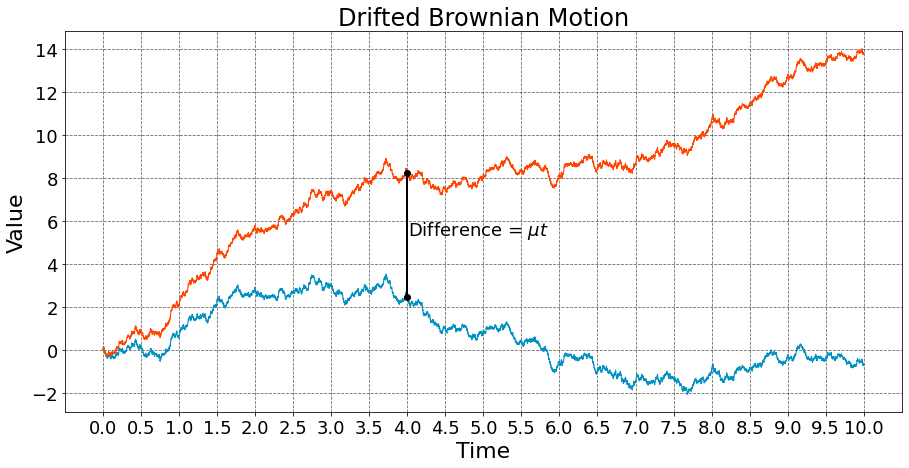

In [ ]:
# plot the two brownian motions

# formatting options
plt.figure(figsize=(15, 7))
plt.title('Drifted Brownian Motion', fontsize=24)
plt.xlabel('Time', fontsize=22)
plt.ylabel('Value', fontsize=22)
plt.xticks(np.linspace(0, T, 2*T + 1), fontsize=18)
plt.yticks(fontsize=18)

plt.grid(True, which='major', linestyle='--', color='black', alpha=0.6)
plt.step(t, W, where='mid', lw=1, color='#0492c2')  # bare Brownian motion
plt.step(t, X, where='mid', lw=1, color='#ff4500')  # Brownian motion with drift
plt.plot([t[4000], t[4000]], [W[4000], X[4000]], 'ko-', lw=2)  # vertical black line
plt.text(t[4000] + 10*dt, (W[4000] + X[4000])/2, 'Difference = $\mu t$', fontsize=18)  # the text next to the line
plt.show()

MovieWriter stderr:
[gif @ 0x557ee3492600] GIF muxer supports only a single video GIF stream.
Could not write header for output file #0 (incorrect codec parameters ?): Invalid argument
Error initializing output stream 0:0 -- 



CalledProcessError: ignored

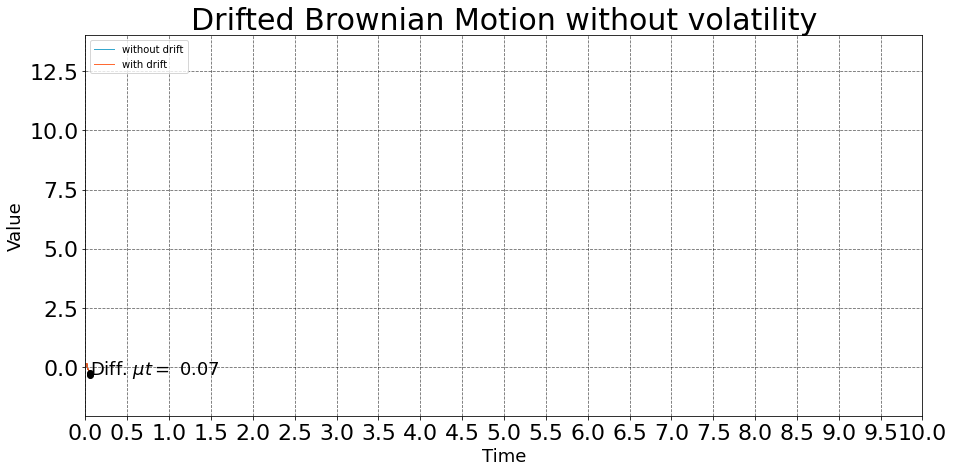

In [ ]:
# ANIMATION

fig =plt.figure(figsize=(15, 7))  # instantiate a figure
ax = plt.axes(xlim=(0, T), ylim=(min_W, max_X))  # create an axes object

line_w, = ax.step([], [], where='mid', lw=1, color='#0492c2', alpha=0.8, label='without drift')  # line for W
line_x, = ax.step([], [], where='mid', lw=1, color='#ff4500', alpha=0.8, label='with drift')  # line for X
diff_line, = ax.plot([], [], 'ko-', lw=2)  # line for the difference
text = ax.text(0, 0, '', fontsize=18)

# formatting options
ax.set_title('Drifted Brownian Motion without volatility', fontsize=30)
ax.set_xticks(np.linspace(0, T, 2*T + 1))
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Value', fontsize=18)
ax.tick_params(labelsize=22)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.6)
ax.legend(loc=2)

# animation options
frames = 400
factor = N // frames
text_offset = 10*dt

def animate(i):
    upper_bound = (i + 1)*factor  # up to what index to take the values
    t_i = t[:upper_bound]
    
    line_w.set_data(list(t_i), list(W[:upper_bound]))  # set data for the W line
    line_x.set_data(list(t_i), list(X[:upper_bound]))  # set data for the X line
    diff_line.set_data([t[upper_bound], t[upper_bound]], [W[upper_bound], X[upper_bound]])  # position of the black line
    text.set_position((t[upper_bound] + text_offset, (W[upper_bound] + X[upper_bound])/2))  # position of the text
    text.set_text('Diff. $\mu t = $ {:.2f}'.format(np.abs(X[upper_bound] - W[upper_bound])))  # diff. value in the text
    
    return line_w, line_x, diff_line, text,
    
# call the animator	 
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=25, blit=True)
# save the animation as mp4 video file 
anim.save('drift_no_vol_bm.gif')

In [ ]:
# Simulate and plot volatile brownian motion

seed_v = 42 # the seed to use
mu_v = 0.0 # the drift
sigma_v = 2.25 # the diffusial

Nv = 10000 # number of discret points
Tv = 10 # number of time units
dt_v = 1.0 * Tv/Nv  # total number of time steps

Wv, _ = brownian_motion(Nv, Tv, 1.0, seed_v)  # standard Brownian Motion
min_Wv, max_Wv = np.min(Wv), np.max(Wv)  # min and max of W

Xv = drifted_brownian_motion(mu_v, sigma_v, Nv, Tv, seed_v)  # drifted version
min_Xv, max_Xv, = np.min(Xv), np.max(Xv)  # min and max of X

t_v = np.linspace(0.0, Nv*dt_v, Nv+1)

In [ ]:
# plot the two brownian motions

# formating options
plt.figure(figsize=(15, 7))
plt.title('Volatile Brownian Motion', fontsize=24)
plt.xlabel('Time', fontsize=22)
plt.ylabel('Value', fontsize=22)
plt.xticks(np.linspace(0, Tv, 2*Tv + 1), fontsize=18)
plt.yticks(fontsize=18)

plt.grid(True, which='major', linestyle='--', color='black', alpha=0.6)
plt.step(t_v, Wv, where='mid', lw=1, color='#0492c2', label='without volatility')  # bare Brownian motion
plt.step(t_v, Xv, where='mid', lw=1, color='#ff4500', label='with volatility')  # Brownian motion with volatility
plt.plot([t_v[3200], t[3200]], [Wv[3200], Xv[3200]], 'ko-', lw=2)  # vertical black line
plt.text(t_v[3200] + 10*dt_v, (Wv[3200] + Xv[3200])/2, 'times $\sigma$', fontsize=18)  # text next to the line
plt.legend(loc=2)
plt.show()

In [ ]:
# ANIMATION
fig = plt.figure(figsize=(15, 7))  # instantiate a figure
ax = plt.axes(xlim=(0, Tv), ylim=(min(min_Wv, min_Xv), max(max_Wv, max_Xv)))  # create an axes object

line_w_v, = ax.step([], [], where='mid', lw=1, color='#0492c2', alpha=0.8, label='without volatility')  # line for W
line_x_v, = ax.step([], [], where='mid', lw=1, color='#ff4500', alpha=0.8, label='with volatility')  # line for X
times_line, = ax.plot([], [], 'ko-', lw=2)  # line for the difference
text_v = ax.text(0, 0, '', fontsize=18)

# formatting options
ax.set_title('Volatile Brownian Motion without drift', fontsize=30)
ax.set_xticks(np.linspace(0, Tv, 2*Tv + 1))
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Value', fontsize=18)
ax.tick_params(labelsize=22)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.6)
ax.legend(loc=2)

# animation options
frames = 400
factor = N // frames
text_offset = 10*dt_v

def animate(i):
    upper_bound = (i + 1)*factor  # up to what index to take values
    t_v_i = t_v[:upper_bound]
    
    line_w_v.set_data(list(t_v_i), list(Wv[:upper_bound]))  # set data for the W line
    line_x_v.set_data(list(t_v_i), list(Xv[:upper_bound]))  # set data for the X line
    times_line.set_data([t_v[upper_bound], t_v[upper_bound]], [Wv[upper_bound], Xv[upper_bound]])  # black line position
    text_v.set_position((t_v[upper_bound] + text_offset, (Wv[upper_bound] + Xv[upper_bound])/2))  # text position
    text_v.set_text('Ratio $\sigma = $ {:.2f}'.format(sigma_v))  # text value
    
    return line_w, line_x, diff_line, text,
    
# call the animator	 
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=25, blit=True)
# save the animation as mp4 video file 
anim.save('vol_no_drift_bm.gif')